In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/cleaned_data.csv")

Filter For US Data Analyst roles

In [3]:
df_DA_US = df[(df.job_title_short == "Data Analyst") & (df.job_country == "United States")]

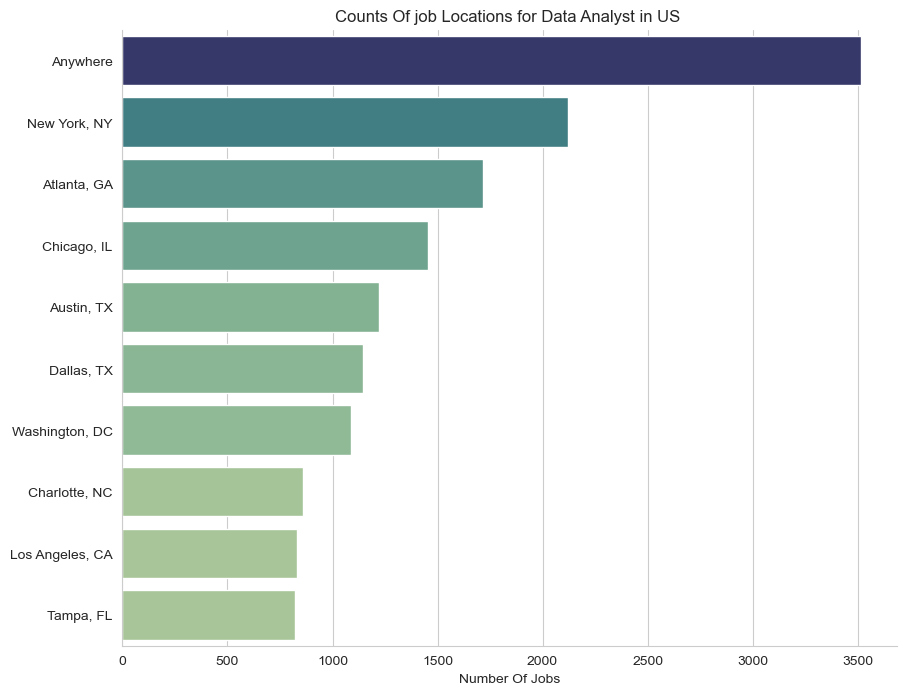

In [4]:

df_plot = df_DA_US.job_location.value_counts().head(10).to_frame()

plt.figure(figsize=(10 , 8))

sns.set_style(style="whitegrid")

sns.barplot(
    data=df_plot, 
    x="count", 
    y="job_location",
    hue="count",
    legend=False,
    palette="crest"
)
sns.despine()
plt.title("Counts Of job Locations for Data Analyst in US ")
plt.xlabel("Number Of Jobs")
plt.ylabel("")
plt.show()

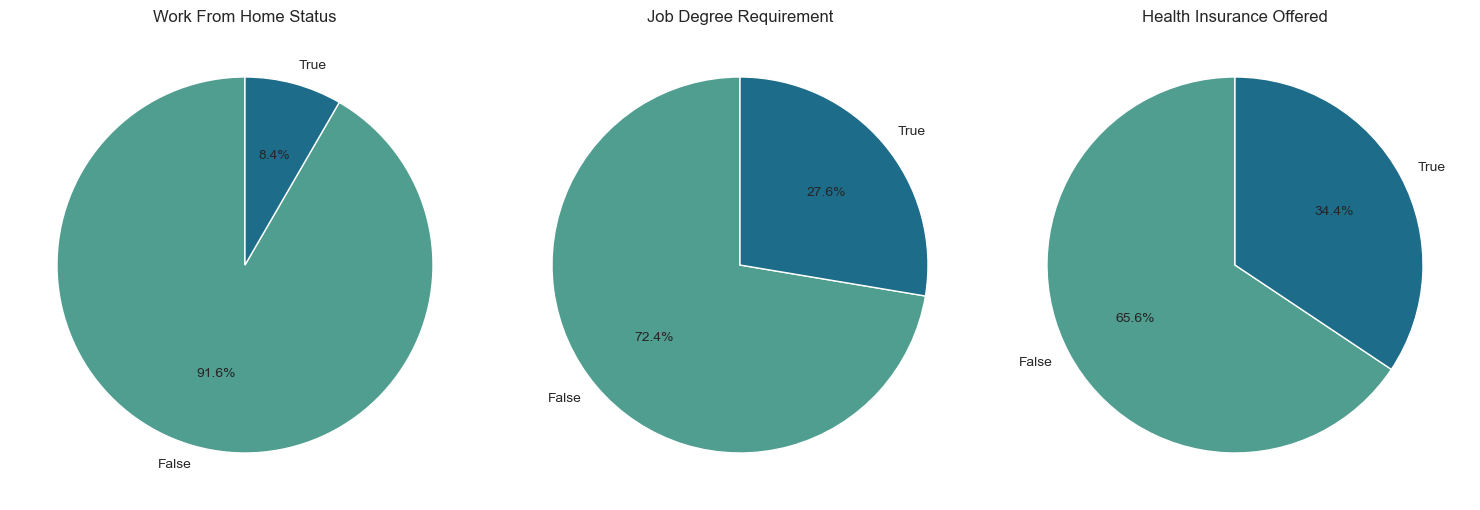

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

dict_columns = {
    "job_work_from_home": "Work From Home Status",
    "job_no_degree_mention": "Job Degree Requirement",
    "job_health_insurance": "Health Insurance Offered",
}

for i, (col, title) in enumerate(dict_columns.items()):
    counts = df_DA_US[col].value_counts()
    
    # Use 'crest' palette for True and False values
    if 'True' in counts.index or 'False' in counts.index:
        palette = sns.color_palette("crest", len(counts))
        # Assume 'False' is darker and 'True' is lighter
        colors = [palette[0] if idx == 'False' else palette[1] for idx in counts.index]
    else:
        # Fallback to equally spaced colors for other values
        colors = sns.color_palette("crest", len(counts))
    
    ax[i].pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors
    )
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

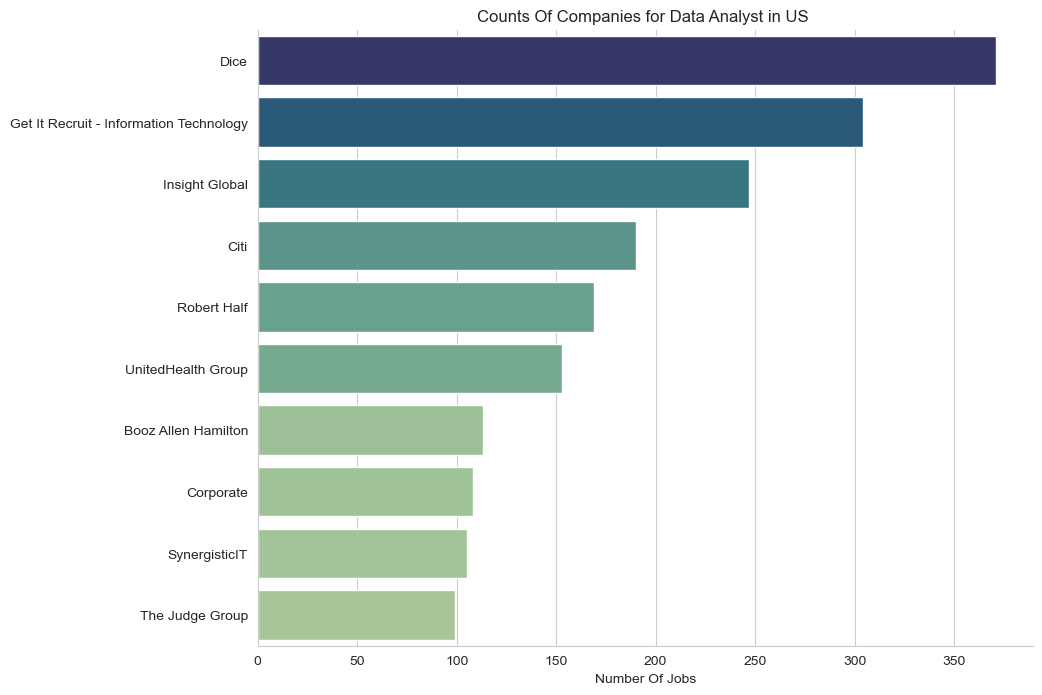

In [6]:

df_plot = df_DA_US.company_name.value_counts().head(10).to_frame()

plt.figure(figsize=(10 , 8))

sns.set_style(style="whitegrid")

sns.barplot(
    data=df_plot, 
    x="count", 
    y="company_name",
    hue="count",
    legend=False,
    palette="crest"
)
sns.despine()
plt.title("Counts Of Companies for Data Analyst in US ")
plt.xlabel("Number Of Jobs")
plt.ylabel("")
plt.show()

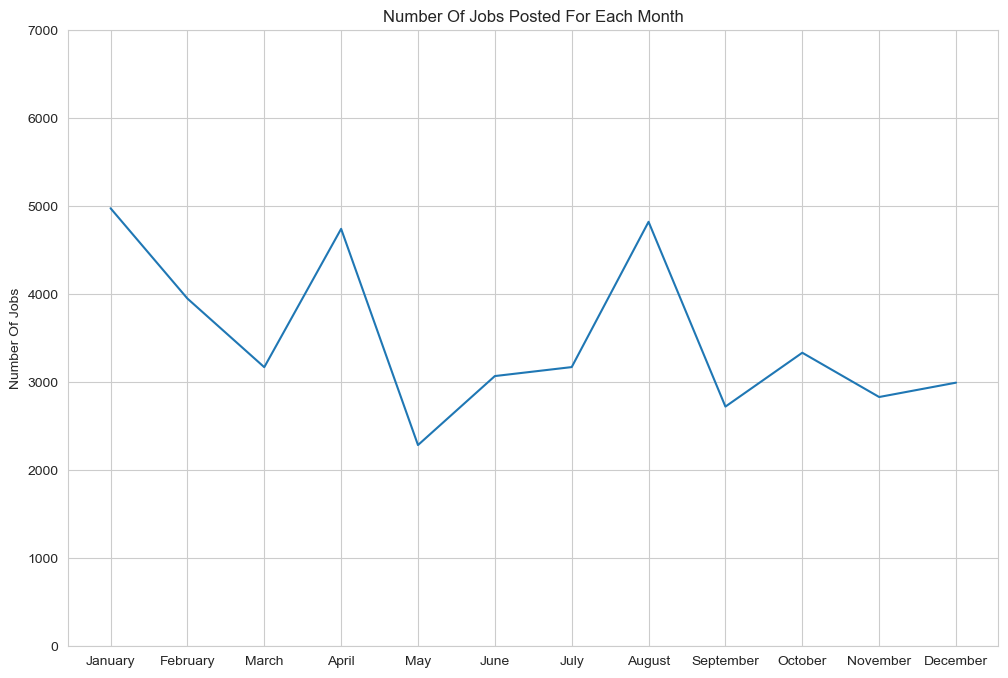

In [7]:
df_plot = df_DA_US.sort_values(by="job_posted_month")
df_plot = df_plot.groupby("job_posted_month")[["job_title_short"]].size().to_frame(name="count")

df_plot.reset_index(inplace=True)
df_plot["month_no"] = pd.to_datetime(df_plot["job_posted_month"] , format="%B").dt.month
df_plot.set_index("job_posted_month", inplace=True)
df_plot.sort_values(by="month_no" , inplace=True)
df_plot.drop(columns="month_no" , inplace=True)

plt.figure(figsize=(12 , 8))
sns.set_style(style="whitegrid")
sns.lineplot(
    data=df_plot,
    x="job_posted_month",
    y="count",   
    legend=False,
)
plt.ylim(0 ,7000)
plt.ylabel("Number Of Jobs")
plt.title("Number Of Jobs Posted For Each Month")
plt.xlabel("")
plt.show()


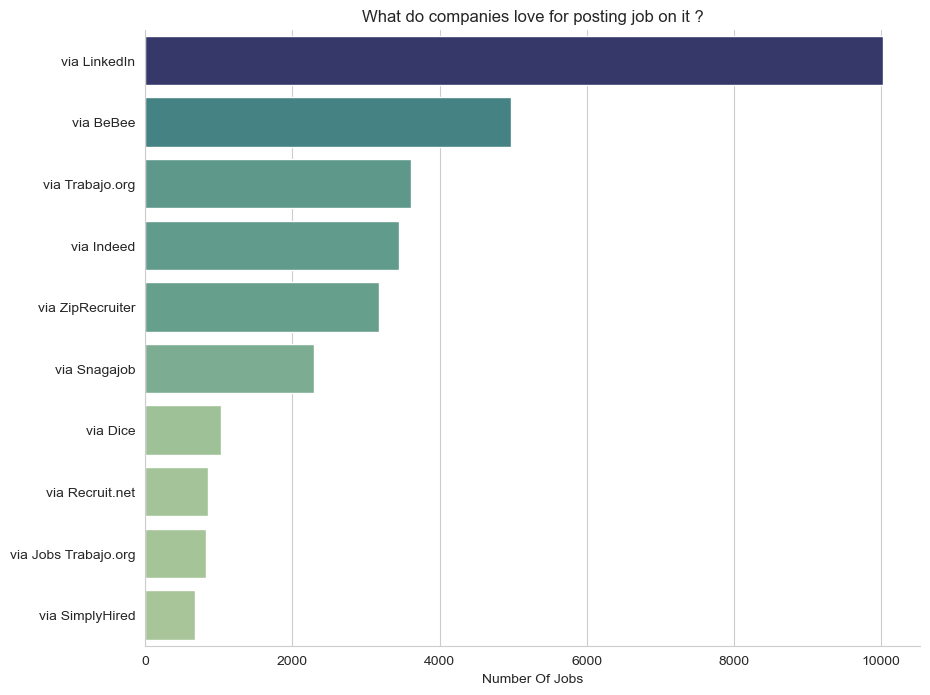

In [8]:
df_plot = df_DA_US.job_via.value_counts().head(10).to_frame()

plt.figure(figsize=(10 , 8))

sns.set_style(style="whitegrid")

sns.barplot(
    data=df_plot, 
    x="count", 
    y="job_via",
    hue="count",
    legend=False,
    palette="crest"
)
sns.despine()
plt.title("What do companies love for posting job on it ?")
plt.xlabel("Number Of Jobs")
plt.ylabel("")
plt.show()
